# Analaysis 🔍

### ❗ NOTES ❗

***Please follow the instructions for this to work properly. Since this was a Hackathon, there was no time to make this into a web app.*** 

- 0. Make sure you have python installed, or the extension `Python` installed in VSCode.
- 1. Note the `pip installs` 
- 2. Go ahead and hit the `Run All` button. 

---

In [1]:
import pandas as pd #!pip install pandas
import matplotlib.pyplot as plt #!pip install matplotlib
import seaborn as sns #!pip install seaborn
from wordcloud import WordCloud #!pip install wordcloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS #!pip install scikit-learn
import sys # make sure you have python installed (the extension is fine)

In [2]:
print(sys.version) # this should be 3.11

3.11.3 (v3.11.3:f3909b8bc8, Apr  4 2023, 20:12:10) [Clang 13.0.0 (clang-1300.0.29.30)]


In [3]:
df = pd.read_csv("../Data/Final_Vader_Time.csv")

df.shape

/var/folders/79/jg9qrvxj5v1_ft3s9qfkpbl40000gn/T/ipykernel_97126/2125904677.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/Final_Vader_Time.csv")


(231306, 19)

In [4]:
df['Correct_TimeStamp'] = pd.to_datetime(df['Correct_TimeStamp'], format='mixed')
df['YearMonth'] = df['Correct_TimeStamp'].dt.to_period('M')
vader_scores_over_time = df.groupby(['YearMonth', 'Vader_Score']).size().unstack(fill_value=0)
vader_scores_over_time = vader_scores_over_time.reset_index()
vader_scores_over_time['YearMonth'] = vader_scores_over_time['YearMonth'].dt.to_timestamp()

In [5]:
filtered_data = vader_scores_over_time[
    (vader_scores_over_time['YearMonth'] >= '2022-10') & 
    (vader_scores_over_time['YearMonth'] <= '2024-02')
]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


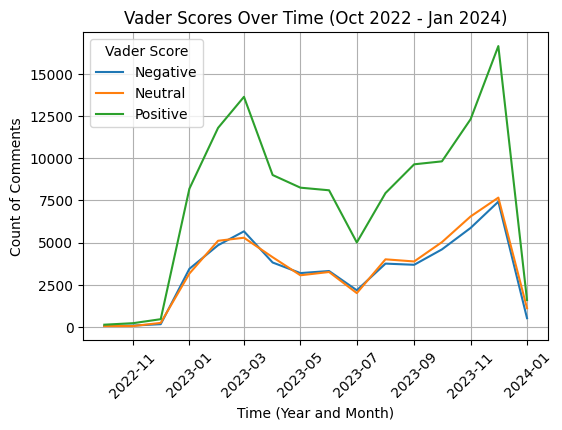

In [6]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='YearMonth', y='value', hue='Vader_Score', data=filtered_data.melt(id_vars='YearMonth'))
plt.title('Vader Scores Over Time (Oct 2022 - Jan 2024)')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Count of Comments')
plt.xticks(rotation=45)
plt.legend(title='Vader Score')
plt.grid(True)
plt.show()

---
---
---

# Search Bar 🔍

- 1. Type in a search string, make sure it stays wrapped in quotes. 
- 2. Run the cell. 
- 3. Run the cell below it. 

In [7]:
search = "god of war"

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


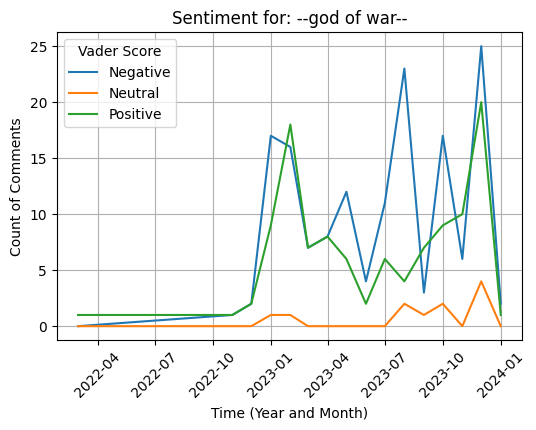

Total comments: 276
Total Negative comments: 154
Total Positive comments: 111
Total Neutral comments: 11


In [8]:
df_filtered = df[df.apply(lambda row: row.astype(str).str.contains(search).any(), axis=1)]

vader_scores_over_time2 = df_filtered.groupby(['YearMonth', 'Vader_Score']).size().unstack(fill_value=0)
vader_scores_over_time2 = vader_scores_over_time2.reset_index()
vader_scores_over_time2['YearMonth'] = vader_scores_over_time2['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(6, 4))
sns.lineplot(x='YearMonth', y='value', hue='Vader_Score', data=vader_scores_over_time2.melt(id_vars='YearMonth'))
plt.title(f'Sentiment for: --{search}--')
plt.xlabel('Time (Year and Month)')
plt.ylabel('Count of Comments')
plt.xticks(rotation=45)
plt.legend(title='Vader Score')
plt.grid(True)
plt.show()

temp_total_comments = vader_scores_over_time2["Negative"].sum() + vader_scores_over_time2["Positive"].sum() + vader_scores_over_time2["Neutral"].sum()

print(f'Total comments: {temp_total_comments}')
print(f'Total Negative comments: {vader_scores_over_time2["Negative"].sum()}')
print(f'Total Positive comments: {vader_scores_over_time2["Positive"].sum()}')
print(f'Total Neutral comments: {vader_scores_over_time2["Neutral"].sum()}')

## Word Cloud 🌩️

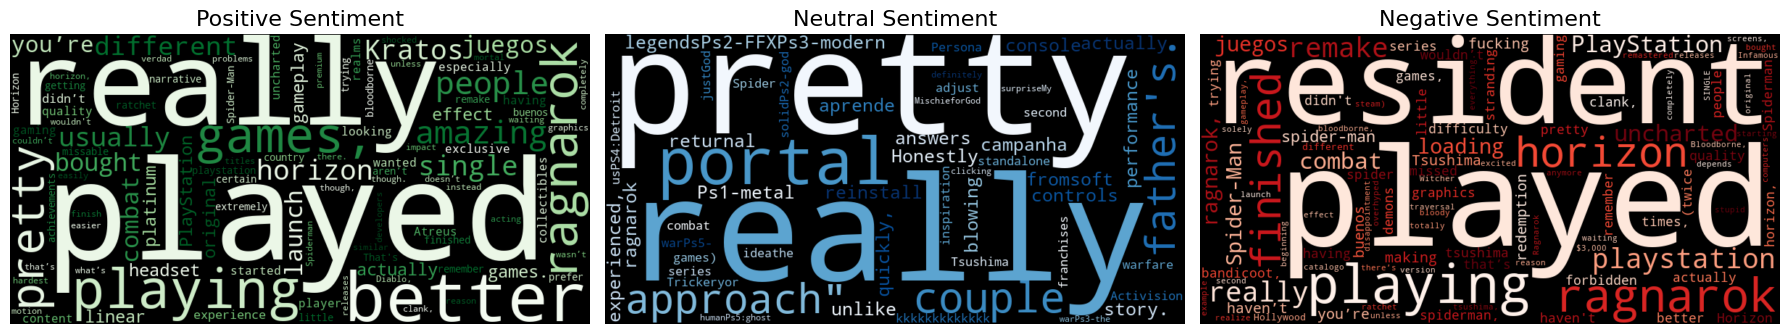

In [9]:
def generate_wordcloud(sentiment, color, axs):
    comments = df_filtered[df_filtered['Vader_Score'] == sentiment]['Comment']
    comments = ' '.join(str(comment) for comment in comments)
    words = [word for word in comments.split() if word.lower() not in ENGLISH_STOP_WORDS]
    word_frequencies = {word: words.count(word) for word in set(words)}
    wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100,
                          colormap=color, random_state=42)
    wordcloud.generate_from_frequencies({word: freq for word, freq in word_frequencies.items() if len(word) > 5})
    axs.imshow(wordcloud, interpolation='bilinear')
    axs.set_title(f'{sentiment.capitalize()} Sentiment', fontsize=16)
    axs.axis('off')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

generate_wordcloud('Positive', 'Greens', axs[0])
generate_wordcloud('Neutral', 'Blues', axs[1])
generate_wordcloud('Negative', 'Reds', axs[2])

plt.tight_layout()
plt.show()